<a href="https://colab.research.google.com/github/domon59/ML/blob/master/Netflix_DataVisu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 
sns.set_style('whitegrid')

In [5]:
nf_df = pd.read_csv('/content/netflix_titles.csv')
nf_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


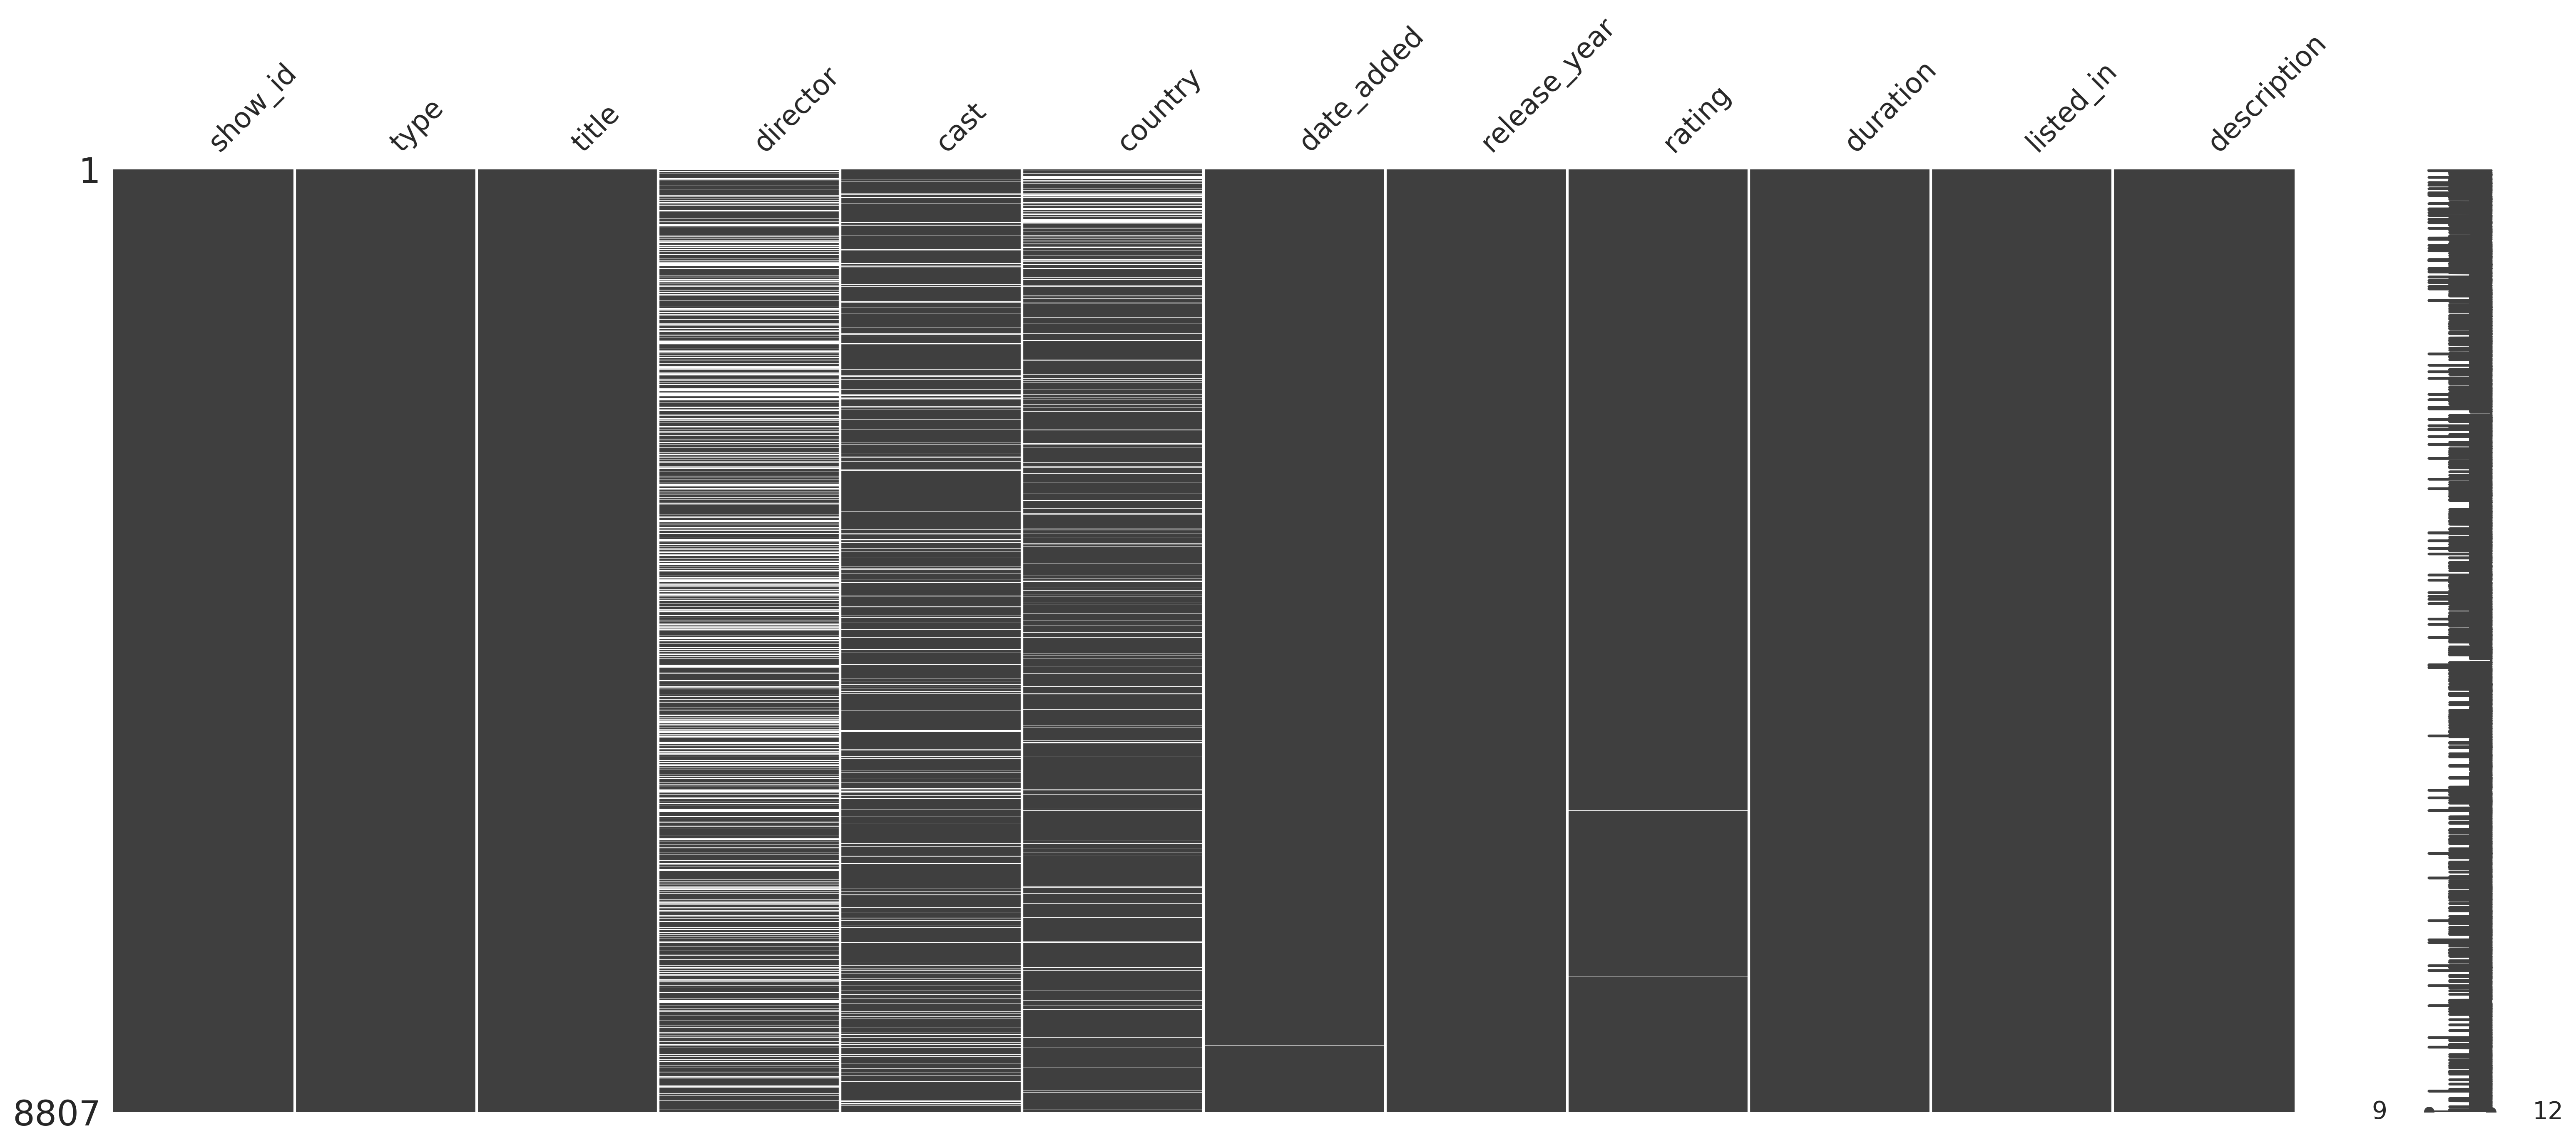

In [7]:
#plot shows missing data
msno.matrix(nf_df)
plt.show()

In [8]:
#calculate missing data
for i in nf_df.columns:
  missing_data_rate = nf_df[i].isnull().sum()/len(nf_df) *100
  if missing_data_rate>0:
    print(f"{i}'s missing data rate: {missing_data_rate}%")

director's missing data rate: 29.908027705234474%
cast's missing data rate: 9.367548540933349%
country's missing data rate: 9.435676166685592%
date_added's missing data rate: 0.11354604292040424%
rating's missing data rate: 0.04541841716816169%
duration's missing data rate: 0.034063812876121265%


In [10]:
nf_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s5567,Movie,ReMastered: Who Killed Jam Master Jay?,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [11]:
#fill missing data with Null
nf_df=nf_df.fillna("NULL")
nf_df['year_add']=nf_df['date_added'].apply(lambda x : x.split(',')[-1])
nf_df['year_add']=nf_df['year_add'].apply(lambda x: x if x != 'NULL' else '2020')
nf_df['year_add']=nf_df['year_add'].apply(int)


In [12]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  year_add      8807 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 894.6+ KB


In [13]:
#Separate data into Move and TV Show
movie = nf_df[nf_df['type']=='Movie']
tv_show=nf_df[nf_df['type']=='TV Show']

In [14]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NULL,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NULL,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021


In [24]:
#Content vs. Year
import matplotlib.patheffects as path_effects
#year_data = nf_df['year_add'].value_counts().sort_index().loc[:2019] # from 2008 ~2019
year_df = nf_df['year_add'].value_counts().sort_index()
type_df = nf_df.groupby('type')['year_add'].value_counts().sort_index().unstack().T.fillna(0)
print(type_df)

type       Movie  TV Show
year_add                 
2008         1.0      1.0
2009         2.0      0.0
2010         1.0      0.0
2011        13.0      0.0
2012         3.0      0.0
2013         6.0      5.0
2014        19.0      5.0
2015        56.0     26.0
2016       253.0    176.0
2017       839.0    349.0
2018      1237.0    412.0
2019      1424.0    592.0
2020      1284.0    605.0
2021       993.0    505.0


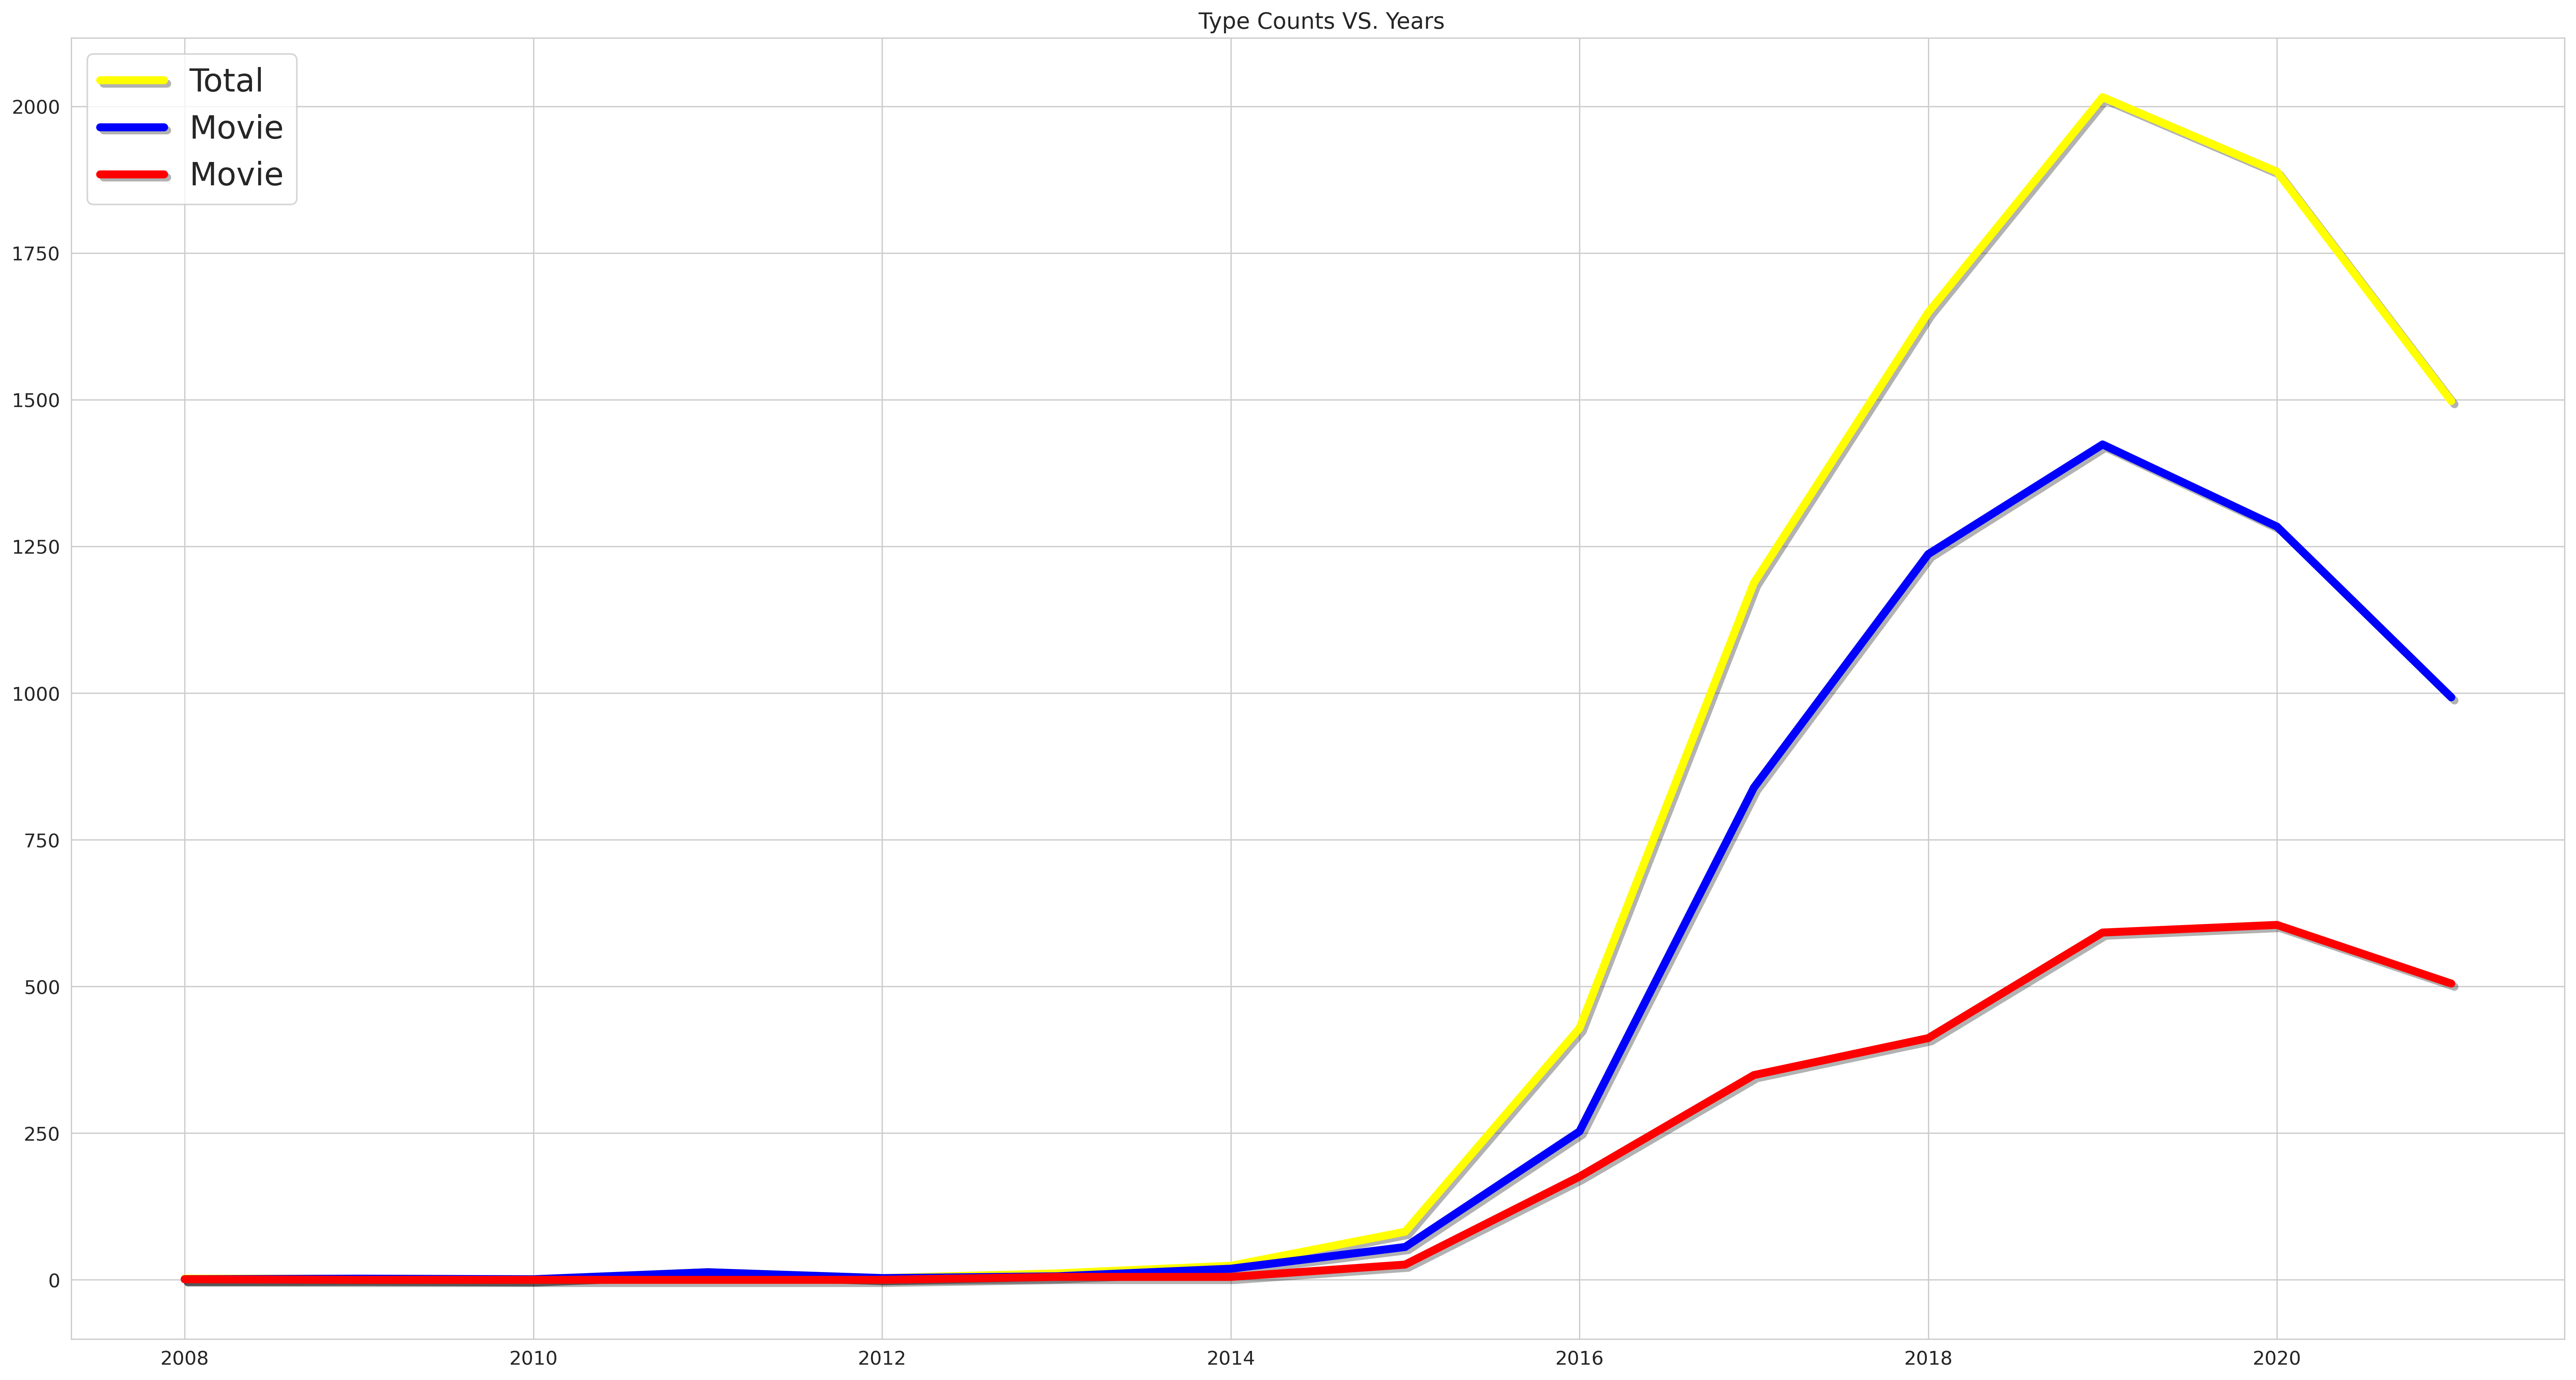

In [27]:
fig, ax = plt.subplots(1,1,figsize = (28,15))
ax.plot(year_df.index, year_df, color ='yellow', linewidth =5, label='Total', path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.plot(type_df.index, type_df['Movie'], color='blue', linewidth = 5, label='Movie', path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.plot(type_df.index, type_df['TV Show'], color ='red',linewidth = 5, label='Movie', path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()] )
ax.set_title(' Type Counts VS. Years')
plt.legend(loc='upper left', fontsize=20)

In [38]:
#Country Analysis
from collections import Counter
country_df= nf_df['country']
# 1 columns include multiple countries
country_counting = pd.Series(dict(Counter(','.join(country_df).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

In [40]:
country_counting

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Cameroon             1
Montenegro           1
Length: 123, dtype: int64

In [49]:
total_count = sum(country_counting)
#According to 80/20 rule to select top 20 country
top_14 = sum(country_counting[:14])
print('total country:', total_count)
print('top 20 country:',top_14) 
print('percentage:', top_14/total_count)

total country: 10019
top 20 country: 8108
percentage: 0.8092624014372692


In [50]:
top_14_country = country_counting[:14]

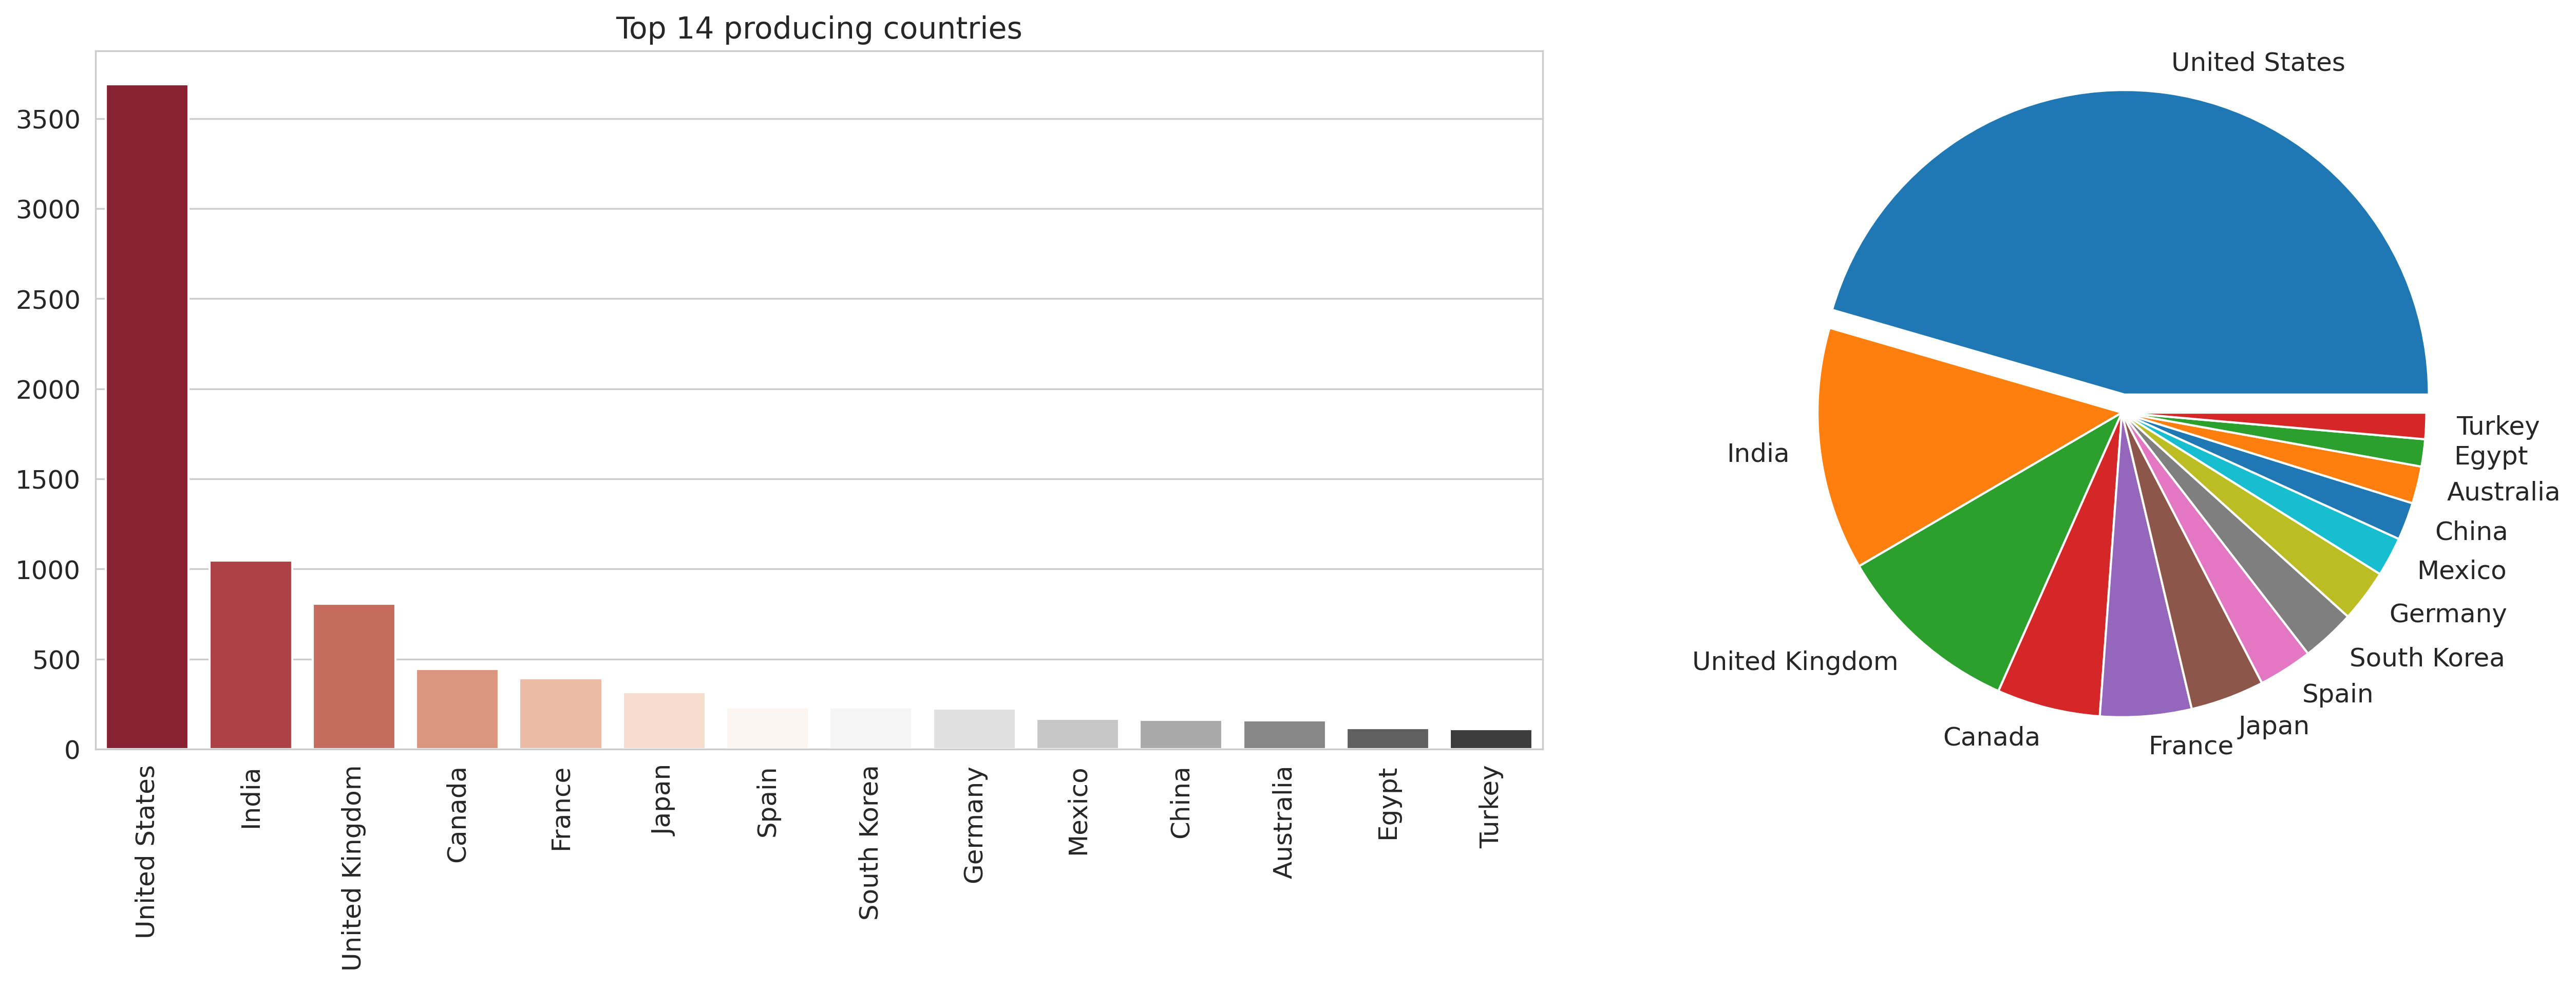

In [56]:
from matplotlib import gridspec
fig = plt.figure(figsize =(20,6))
gd = gridspec.GridSpec(nrows=1, ncols=2, height_ratios = [6], width_ratios= [10,5])

ax= plt.subplot(gd[0])
sns.barplot(top_14_country.index, top_14_country, ax =ax, palette='RdGy')
ax.set_xticklabels(top_14_country.index, rotation ='90')
ax.set_title('Top 14 producing countries')

explode = [0 for _ in range(14)]
explode[0] =0.06

ax2=plt.subplot(gd[1])
ax2.pie(top_14_country, labels=top_14_country.index, shadow = False, startangle=0, explode = explode, )
ax2.axis('equal')
plt.show()

In [59]:
pip install squarify

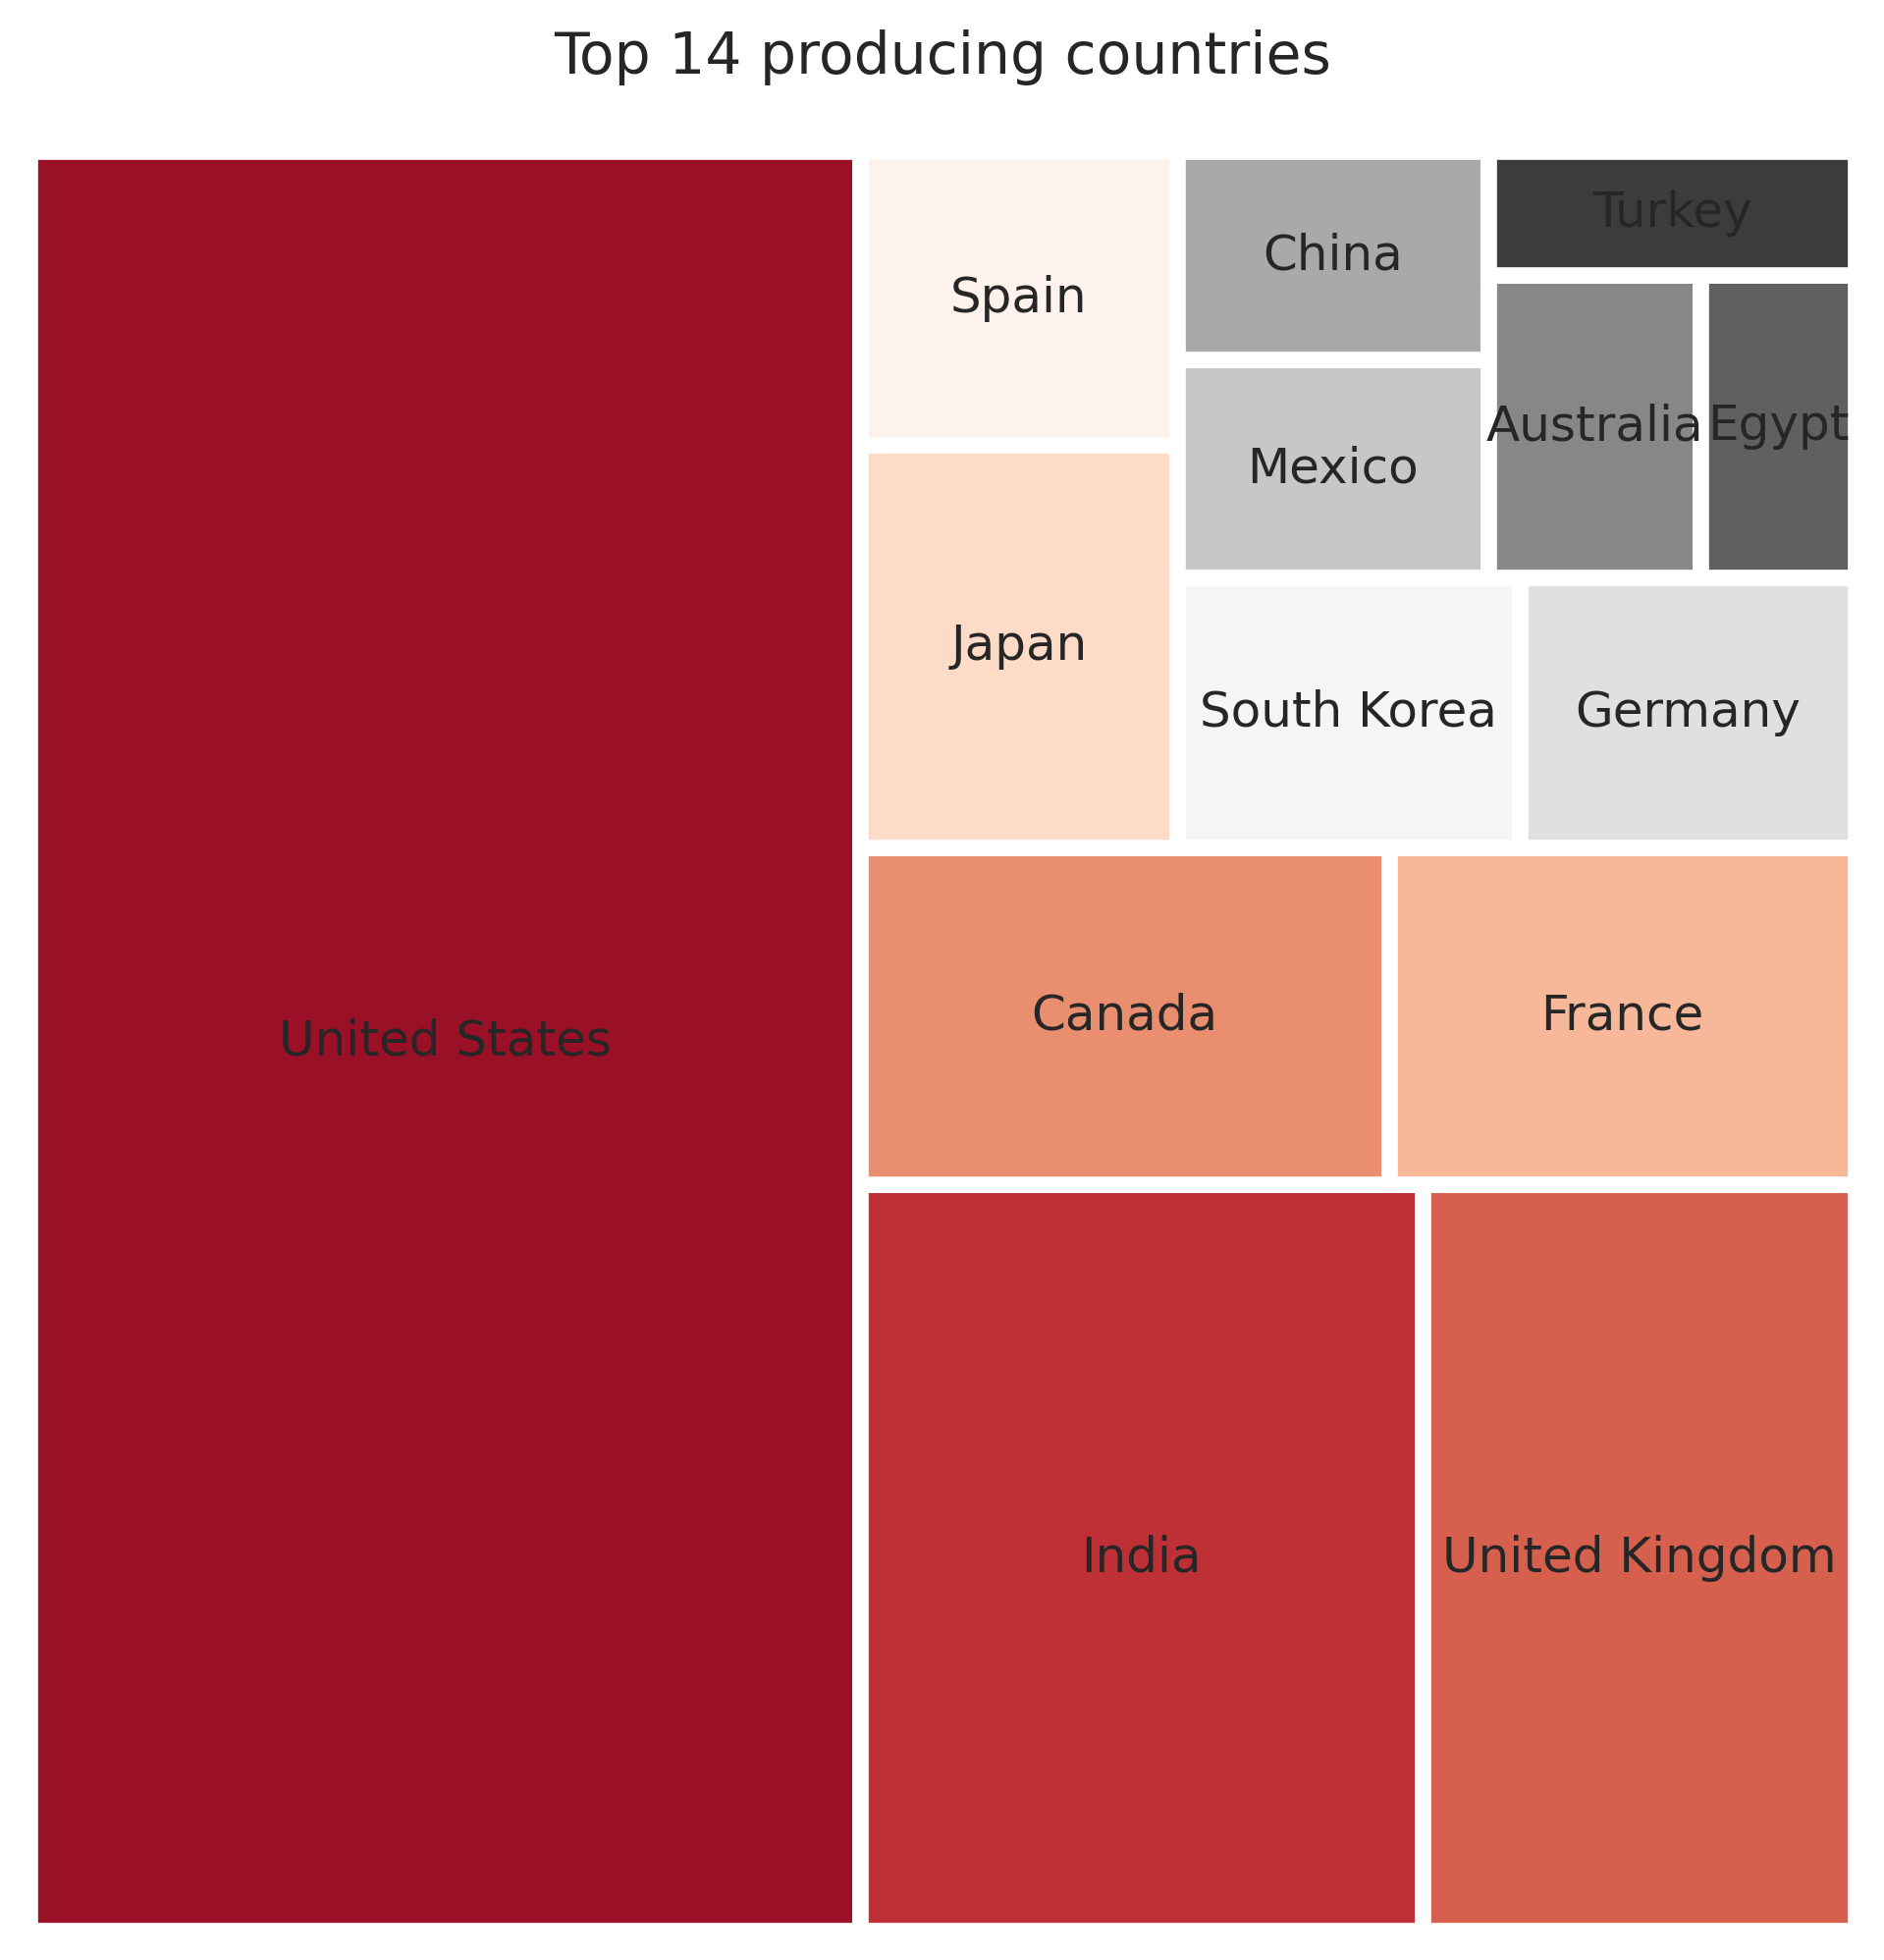

In [64]:
# Tree map
import squarify
y = top_14_country
fig = plt.figure(figsize = (8,8))
squarify.plot(sizes= y.values, label = y.index, color = sns.color_palette("RdGy", n_colors=14), linewidth=4)
plt.title('Top 14 producing countries', position=(0.5,1.0+0.03))
plt.axis('off')
plt.show()